In [2]:
"""Problem set 03."""

# Local modules
from pset.data import load_data
from pset.algorithms import simulated_annealing as SA

# Global imports
import random
import numpy as np


museums = load_data()


def f(path):
    """Cost function."""
    N = path[0].N
    total = 0
    for i in range(len(path) - 1):
        total += path[i].distance_to(path[i + 1])
    return total / N


def n(path, n=1):
    """Return neighbour path."""
    swaps = [random.choice(range(1, len(path) - 1)) for _ in range(n)]
    new_path = path[:]
    for s in swaps:
        new_path[s], new_path[s+1] = new_path[s+1], new_path[s]
    return new_path


def create_random_path(starting_at, ending_at, vertices):
    """Given an starting and ending point return a random path."""
    path = vertices[:]
    start = path[starting_at]
    end = path[ending_at]
    random.shuffle(path)
    start_i, end_i = path.index(start), path.index(end)
    path[start_i], path[0] = path[0], path[start_i]
    path[end_i], path[-1] = path[-1], path[end_i]
    print('\nNew random path created:')
    print('\t', path)
    return path


def linear_schedule(t, t0, alpha):
    """Decrease given temperature linearly."""
    return t0 - (alpha * t)


def exponential_schedule(t, t0, alpha):
    """Decrease given temperature exponentially."""
    return t0*(alpha**t)


s0 = create_random_path(starting_at=10, ending_at=0, vertices=museums)
t0 = 100
max_iters = 10000
alpha = 0.95
t = lambda x: exponential_schedule(x, t0, alpha)

best_path = SA(s0=s0, e=f, n=n, t=t, max_iters=max_iters)
print(s0, 'costs:', f(s0))
print(best_path, 'costs:', f(best_path))

Importing museums:
	✅[1] Universum
	✅[2] Templo Mayor
	✅[3] Antiguo Colegio de San Idelfonso
	✅[4] Palacio Nacional
	✅[5] Museo Nacional del Arte
	✅[6] Museo del Estanquillo
	✅[7] Antiguo Palacio de Iturbide
	✅[8] Museo Franz Mayer
	✅[9] Museo de Memoria y Tolerancia
	✅[10] Museo Soumaya
	✅[11] Museo Casa del Risco
	✅[12] Museo de El Carmen
	✅[13] Museo de Arte Carrillo Gil
	✅[14] Museo Casa de León Trotsky
	✅[15] Museo de Historia Natural
	✅[16] Museo de Arte Moderno

Adding edges:
	🔗[15] <---> [16]
	🔗[1] <---> [11]
	🔗[1] <---> [12]
	🔗[1] <---> [13]
	🔗[14] <---> [13]
	🔗[12] <---> [13]
	🔗[11] <---> [12]
	🔗[11] <---> [13]
	🔗[14] <---> [11]
	🔗[14] <---> [15]
	🔗[14] <---> [16]
	🔗[15] <---> [10]
	🔗[16] <---> [10]
	🔗[9] <---> [10]
	🔗[9] <---> [16]
	🔗[2] <---> [3]
	🔗[3] <---> [4]
	🔗[2] <---> [4]
	🔗[5] <---> [6]
	🔗[5] <---> [7]
	🔗[5] <---> [8]
	🔗[3] <---> [6]
	🔗[7] <---> [8]
	🔗[7] <---> [6]
	🔗[7] <---> [9]
	🔗[8] <---> [9]
	🔗[2] <---> [7]

Adding normalizer
	Computed: 60146.9152832125

New ran

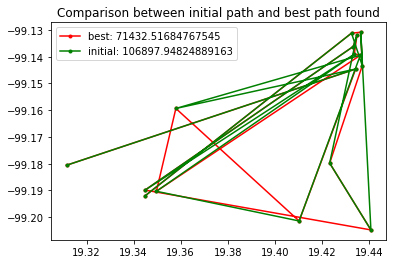

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

Xb = [x.latitude for x in best_path]
Yb = [y.longitude for y in best_path]
Xw = [x.latitude for x in s0]
Yw = [y.longitude for y in s0]

plt.title('Comparison between initial path and best path found')
best, = plt.plot(Xb, Yb, color='r', marker='.', label='best: {}'.format(f(best_path)))
initial, = plt.plot(Xw, Yw, color='g', marker='.', label='initial: {}'.format(f(s0)))
plt.legend(handles=[best, initial])
plt.show()